# Demo of a KDE plot beside timeseries set

In [1]:
%pylab inline
import pysd
import numpy as np
import pandas as pd
import seaborn

Populating the interactive namespace from numpy and matplotlib


### Load the model using PySD
The model is a basic, 1-stock carbon bathtub model

In [2]:
model = pysd.read_vensim('../../models/Climate/Atmospheric_Bathtub.mdl')
print(model.doc)

                   Real Name                    Py Name Subscripts  Units  \
0                  Emissions                  emissions       None   None   
1  Excess Atmospheric Carbon  excess_atmospheric_carbon       None   None   
2                 FINAL TIME                 final_time       None  Month   
3               INITIAL TIME               initial_time       None  Month   
4            Natural Removal            natural_removal       None   None   
5           Removal Constant           removal_constant       None   None   
6                    SAVEPER                    saveper       None  Month   
7                  TIME STEP                  time_step       None  Month   
8                       Time                       time       None   None   

       Limits       Type Subtype                                     Comment  
0  (nan, nan)   Constant  Normal                                        None  
1  (nan, nan)   Stateful   Integ                                       

### Generate a set of parameters to use as input
Here, drawing 100 constant values for the `Emissions` parameter from an exponential distribution

In [3]:
n_runs = 100
runs = pd.DataFrame({'Emissions': np.random.exponential(scale=10000, size=n_runs)})
runs.head()

,Emissions
0,207.734860
1,7109.125870
2,4768.041210
3,2191.302602
4,16930.863016


### Run the model with the various parameters

In [4]:
result = runs.apply(lambda p: model.run(params=dict(p))['Excess Atmospheric Carbon'],
                    axis=1).T
result.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,207.734860,7109.125870,4768.041210,2191.302602,16930.863016,14676.223891,2058.091604,9229.459073,1215.333008,22711.067942,...,5438.319103,13029.384661,28268.791836,7543.867757,12566.422839,1565.757571,1029.656855,2802.757320,18335.083353,3311.616813
2,413.392371,14147.160482,9488.402008,4360.692179,33692.417401,29205.685543,4095.602292,18366.623556,2418.512686,45195.025205,...,10822.255014,25928.475475,56254.895754,15012.296837,25007.181449,3115.857566,2049.017141,5577.487067,36486.815873,6590.117458
3,616.993307,21114.814748,14161.559198,6508.387860,50286.356243,43589.852579,6112.737873,27412.416393,3609.660567,67454.142895,...,16152.351567,38698.575381,83961.138633,22406.041626,37323.532473,4650.456561,3058.183825,8324.469516,54457.031068,9835.833097
4,818.558233,28012.792471,18787.984817,8634.606583,66714.355696,57830.177944,8109.702098,36367.751302,4788.896970,89490.669408,...,21429.147154,51340.974288,111390.319083,29725.848967,49516.719987,6169.709566,4057.258842,11043.982140,72247.544111,13049.091579


### Draw a plot showing the results, and a marginal density plot

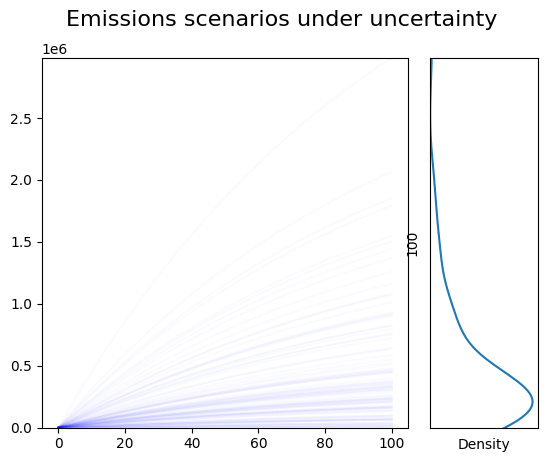

In [5]:
# left side should have all traces plotted
plt.subplot2grid((1,4), loc=(0,0), colspan=3)
[plt.plot(result.index, result[i], 'b', alpha=.02) for i in result.columns]
plt.ylim(0, max(result.iloc[-1]))

# right side has gaussian KDE on last timestamp
plt.subplot2grid((1,4), loc=(0,3))
seaborn.kdeplot(y=result.iloc[-1])
plt.ylim(0, max(result.iloc[-1]));
plt.yticks([])
plt.xticks([])

plt.suptitle('Emissions scenarios under uncertainty', fontsize=16);